In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


In [ ]:
df=pd.read_csv(r"C:\Users\Ozair\Downloads\sales_data_missing.csv")

In [ ]:
df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          100 non-null    object 
 1   customer_id       100 non-null    object 
 2   product_id        100 non-null    int64  
 3   product_category  94 non-null     object 
 4   date              100 non-null    object 
 5   amount            94 non-null     float64
 6   single_price      100 non-null    float64
 7   transaction_id    100 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


In [5]:
df['product_category'].unique()

array(['Toys', 'Movies', 'Books', 'Clothing', 'Sports', 'Health', nan,
       'Electronics', 'Home/Garden'], dtype=object)

In [6]:
d={'Toys':1,'Movies':2,'Books':3,'Clothing':4,'Sports':5,'Health':6,'Electronics':7,'Home/Garden':8}

In [7]:
df['product_category']=df['product_category'].replace(d)

In [8]:
#mode_category = st.mode(df['product_category'])
#print(mode_category)
#df['product_category'] = df['product_category'].fillna(mode_category[0])
df.dropna(inplace=True)

In [9]:
#mode_category = st.mode(df['product_category'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          88 non-null     object 
 1   customer_id       88 non-null     object 
 2   product_id        88 non-null     int64  
 3   product_category  88 non-null     float64
 4   date              88 non-null     object 
 5   amount            88 non-null     float64
 6   single_price      88 non-null     float64
 7   transaction_id    88 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


In [11]:
df.drop(columns=['store_id','product_id','customer_id','transaction_id'],inplace=True)

In [12]:
df['date']=pd.to_datetime(df['date'])

In [13]:
import pandas as pd

# Assuming df is your DataFrame with a 'date' column
# Create a new DataFrame with year, day, week, and quarter extracted from the 'date' column
new_df = pd.DataFrame({
    'year': df['date'].dt.year,
    'day': df['date'].dt.day,
    'week': df['date'].dt.isocalendar().week,
    'quarter': df['date'].dt.quarter,
    'hour':df['date'].dt.hour
})


In [14]:
combined_df = pd.concat([new_df, df], axis=1)


In [15]:
combined_df.columns

Index(['year', 'day', 'week', 'quarter', 'hour', 'product_category', 'date',
       'amount', 'single_price'],
      dtype='object')

In [16]:
merged_df = pd.merge(combined_df, df)

# print the columns of the merged dataframe
print(merged_df.columns)

Index(['year', 'day', 'week', 'quarter', 'hour', 'product_category', 'date',
       'amount', 'single_price'],
      dtype='object')


In [17]:
merged_df.drop(columns='date',inplace=True)

In [18]:
merged_df

,year,day,week,quarter,hour,product_category,amount,single_price
0,2007,1,13,2,8,1.0,3.0,90.246230
1,2005,15,7,1,10,2.0,2.0,60.586312
2,2007,27,39,3,5,2.0,5.0,96.612695
3,2005,7,18,2,13,3.0,5.0,16.962671
4,2008,6,1,1,17,4.0,5.0,65.215310
...,...,...,...,...,...,...,...,...
83,2005,23,21,2,16,1.0,8.0,93.641214
84,2006,17,46,4,0,6.0,2.0,81.335683
85,2008,1,5,1,18,7.0,3.0,54.128274
86,2005,6,27,3,17,8.0,6.0,97.923186


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              88 non-null     int32  
 1   day               88 non-null     int32  
 2   week              88 non-null     UInt32 
 3   quarter           88 non-null     int32  
 4   hour              88 non-null     int32  
 5   product_category  88 non-null     float64
 6   amount            88 non-null     float64
 7   single_price      88 non-null     float64
dtypes: UInt32(1), float64(3), int32(4)
memory usage: 4.0 KB


## Visualization

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [63]:
import plotly.graph_objects as go
import panel as pn


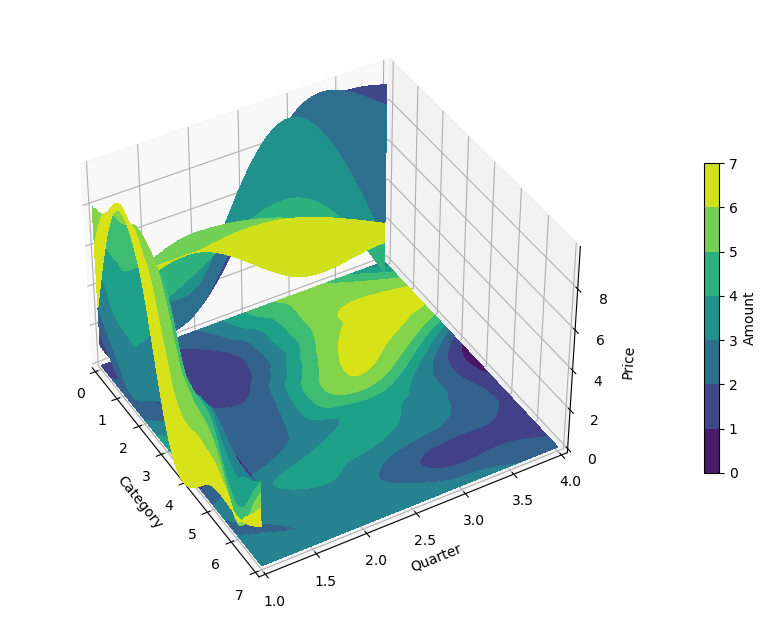

In [21]:
# Convert product_category to numerical values
merged_df['product_category_numeric'] = pd.factorize(merged_df['product_category'])[0]

# Define dimensions
Nx, Ny = 100, 100
X, Y = np.meshgrid(np.linspace(merged_df['product_category_numeric'].min(), merged_df['product_category_numeric'].max(), Nx),
                   np.linspace(merged_df['quarter'].min(), merged_df['quarter'].max(), Ny))

# Interpolate the Z values onto the regular grid defined by X and Y
from scipy.interpolate import griddata
Z = griddata((merged_df['product_category_numeric'], merged_df['quarter']), merged_df['amount'], (X, Y), method='cubic')

# Remove NaN or Inf values from Z
Z = np.nan_to_num(Z, nan=np.nanmean(Z), posinf=np.nanmean(Z), neginf=np.nanmean(Z))

# Create a figure with 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
ax.contourf(X, Y, Z, zdir='z', offset=0, cmap='viridis')
ax.contourf(X, Y, Z, zdir='y', offset=merged_df['quarter'].min(), cmap='viridis')
C = ax.contourf(X, Y, Z, zdir='x', offset=merged_df['product_category_numeric'].min(), cmap='viridis')

# Set limits of the plot
ax.set(xlim=[merged_df['product_category_numeric'].min(), merged_df['product_category_numeric'].max()],
       ylim=[merged_df['quarter'].min(), merged_df['quarter'].max()],
       zlim=[0, Z.max()])

# Set labels and zticks
ax.set(xlabel='Category', ylabel='Quarter', zlabel='Price')

# Set zoom and angle view
ax.view_init(40, -30)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Amount')

# Show Figure
plt.show()


In [49]:
d={1:'Toys',2:'Movies',3:'Books',4:'Clothing',5:'Sports',6:'Health',7:'Electronics',8:'Home/Garden'}

In [50]:
merged_df['product_category']=merged_df['product_category'].replace(d)
merged_df.head()

,year,day,week,quarter,hour,product_category,amount,single_price,product_category_numeric
0,2007,1,13,2,8,Toys,3.0,90.246230,0
1,2005,15,7,1,10,Movies,2.0,60.586312,1
2,2007,27,39,3,5,Movies,5.0,96.612695,1
3,2005,7,18,2,13,Books,5.0,16.962671,2
4,2008,6,1,1,17,Clothing,5.0,65.215310,3


In [51]:
data_cube = pd.pivot_table(
    merged_df,
    values='single_price',
    index='product_category',
    columns='quarter',
    aggfunc='sum'
)

# Extract categories and quarters
categories = data_cube.index
quarters = data_cube.columns

# Create meshgrid for 3D plot
category_mesh, quarter_mesh = np.meshgrid(categories, quarters, indexing='ij')

# Flatten the meshgrid and extract the corresponding values
category_flat = category_mesh.flatten()
quarter_flat = quarter_mesh.flatten()
values_flat = data_cube.values.flatten()

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=category_flat,
    y=quarter_flat,
    z=values_flat,
    mode='markers',
    marker=dict(
        size=8,
        color=values_flat,  # set color to the z values
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
)])

# Update layout for better visualization
fig.update_layout(
    title="3D Scatter Plot of Single Prices",
    scene=dict(
        xaxis_title='Product Category',
        yaxis_title='Quarter',
        zaxis_title='Single Price'
    ),
    width=700,
    height=700,
    margin=dict(t=50, b=50, r=50, l=50)
)

# Display the plot inline
fig.show()

## Analysis of Total Amount by Quarter and Product Category

In [52]:

# Create the data cube
data_cube_amount = pd.pivot_table(
    merged_df,
    values='amount',
    index='product_category',
    columns='quarter',
    aggfunc='sum'
)

# Transform the data cube to a suitable format for 3D plotting
categories_amount = data_cube_amount.index
quarters_amount = data_cube_amount.columns

# Create meshgrid for 3D plot
category_mesh_amount, quarter_mesh_amount = np.meshgrid(categories_amount, quarters_amount, indexing='ij')

# Flatten the meshgrid and extract the corresponding values
category_flat_amount = category_mesh_amount.flatten()
quarter_flat_amount = quarter_mesh_amount.flatten()
values_flat_amount = data_cube_amount.values.flatten()

# Create a 3D scatter plot
fig_amount = go.Figure(data=[go.Scatter3d(
    x=category_flat_amount,
    y=quarter_flat_amount,
    z=values_flat_amount,
    mode='markers',
    marker=dict(
        size=8,
        color=values_flat_amount,  # set color to the z values
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
)])

# Update layout for better visualization
fig_amount.update_layout(
    title="3D Scatter Plot of Total Amount",
    scene=dict(
        xaxis_title='Product Category',
        yaxis_title='Quarter',
        zaxis_title='Total Amount'
    ),
    width=700,
    height=700,
    margin=dict(t=50, b=50, r=50, l=50)
)

# Display the plot inline
fig_amount.show()

## Analysis of Single Price by Day and Hour


In [53]:
# Create a 3D scatter plot
import plotly.express as px

fig_single_price_week = px.scatter_3d(merged_df, x='product_category', y='quarter', z='week', color='single_price',
                                      labels={'product_category': 'Product Category', 'quarter': 'Quarter', 'week': 'Week'},
                                      title="3D Plot of Single Price by Product Category, Quarter, and Week")
fig_single_price_week.show()


In [54]:
import plotly.express as px


# Create the data cube
data_cube = pd.pivot_table(merged_df, 
                           values=['single_price', 'amount'], 
                           index=['year', 'product_category'], 
                           aggfunc={'single_price': np.mean, 'amount': np.sum})

data_cube.reset_index(inplace=True)

fig = px.scatter_3d(data_cube, 
                    x='year', 
                    y='single_price', 
                    z='amount', 
                    color='product_category',
                    labels={'year': 'Year', 'single_price': 'Single Price', 'amount': 'Amount', 'product_category': 'Product Category'},
                    title="3D Plot of Single Price, Amount, and Year by Product Category")
fig.show()


In [55]:
merged_df.columns

Index(['year', 'day', 'week', 'quarter', 'hour', 'product_category', 'amount',
       'single_price', 'product_category_numeric'],
      dtype='object')

## Panel

In [73]:

def create_3d_scatter(df, x_col, y_col, z_col, title):
    # Create a 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=df[x_col],
        y=df[y_col],
        z=df[z_col],
        mode='markers',
        marker=dict(
            size=8,
            color=df[z_col],  # set color to the z values
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        )
    )])

    # Update layout for better visualization
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=x_col,
            yaxis_title=y_col,
            zaxis_title=z_col
        ),
        width=700,
        height=700,
        margin=dict(t=50, b=50, r=50, l=50)
    )

    return fig

# Create plots for different analyses
fig_amount_by_quarter = create_3d_scatter(merged_df, 'product_category', 'quarter', 'amount', '3D Scatter Plot of Amount by Quarter')
fig_price_by_day = create_3d_scatter(merged_df, 'product_category', 'day', 'single_price', '3D Scatter Plot of Single Price by Day')
fig_amount_by_hour = create_3d_scatter(merged_df, 'product_category', 'hour', 'amount', '3D Scatter Plot of Amount by Hour')
fig_price_by_week = create_3d_scatter(merged_df, 'product_category', 'week', 'single_price', '3D Scatter Plot of Single Price by Week')
fig_amount_by_product_num = create_3d_scatter(merged_df, 'product_category_numeric', 'quarter', 'amount', '3D Scatter Plot of Amount by Product Category Numeric')

# Create Panel layout
panel_layout = pn.Column(
    pn.pane.Markdown("# 3D Scatter Plots of Different Metrics"),
    pn.Row(pn.pane.Plotly(fig_amount_by_quarter), pn.pane.Plotly(fig_price_by_day)),
    pn.Row(pn.pane.Plotly(fig_amount_by_hour), pn.pane.Plotly(fig_price_by_week)),
    pn.Row(pn.pane.Plotly(fig_amount_by_product_num))
)

# Display the panel inline
pn.extension()
panel_layout.servable()
panel_layout.show()

Launching server at http://localhost:50633


In [72]:
def create_3d_scatter(df, x_col, y_col, z_col, title):
    fig = px.scatter_3d(df, x=x_col, y=y_col, z=z_col, color='product_category')
    fig.update_layout(title=title, width=700, height=500)
    return fig

# Create a panel layout
pn.extension()

# Create a sidebar for plot selection
plot_select = pn.widgets.Select(options=['Amount by Quarter', 'Price by Day', 'Amount by Hour', 'Price by Week', 'Amount by Product Num'], value='Amount by Quarter', sizing_mode="stretch_width")

# Function to update the plot based on the selection
@pn.depends(plot_select)
def update_plot(selection):
    if selection == 'Amount by Quarter':
        fig = create_3d_scatter(merged_df, 'product_category', 'quarter', 'amount', '3D Scatter Plot of Amount by Quarter')
    elif selection == 'Price by Day':
        fig = create_3d_scatter(merged_df, 'product_category', 'day', 'single_price', '3D Scatter Plot of Single Price by Day')
    elif selection == 'Amount by Hour':
        fig = create_3d_scatter(merged_df, 'product_category', 'hour', 'amount', '3D Scatter Plot of Amount by Hour')
    elif selection == 'Price by Week':
        fig = create_3d_scatter(merged_df, 'product_category', 'week', 'single_price', '3D Scatter Plot of Single Price by Week')
    elif selection == 'Amount by Product Num':
        fig = create_3d_scatter(merged_df, 'product_category_numeric', 'quarter', 'amount', '3D Scatter Plot of Amount by Product Category Numeric')
    return fig

# Create a panel with the plot and sidebar
panel = pn.Column(
    pn.pane.Markdown('# 3D Scatter Plots of Different Metrics'),
    pn.pane.Markdown('Select a metric to visualize in 3D'),
    plot_select,
    update_plot
)

# Serve the panel
panel.servable()
panel.show()

Launching server at http://localhost:50476
